# NAME: Justin Jeremiah Rangad
# ROLL NUMBER: EE21B062

# Plotting and Visualization

Many problems encountered in EE involve processing large amounts of data.  One of the first steps here would be to visualize this data to understand what it looks like and what can be done with it.

In [1]:
# Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

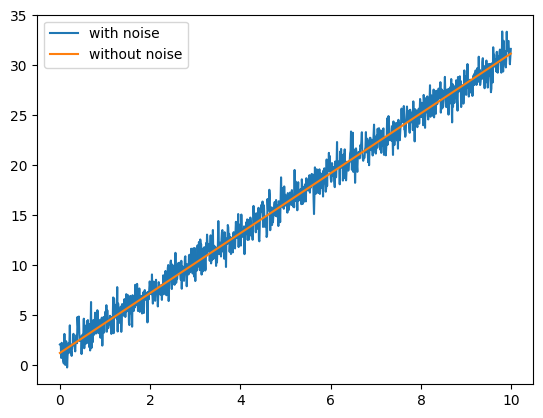

In [2]:
# Create a time base and a straight line fit
t = np.arange(0, 10, 0.01)
def stline(x, m, c):
    return m * x + c
y = stline(t, 3, 1.2)
# Add Gaussian noise
n = 1 * np.random.randn(len(t))
yn = y + n
plt.plot(t, yn, label="with noise")
plt.plot(t, y, label="without noise")
plt.legend()
plt.show()

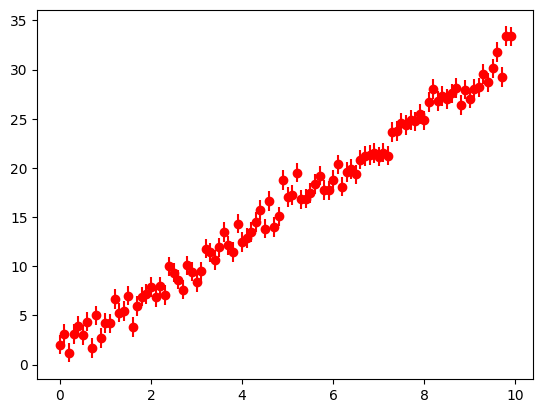

In [3]:
# Get errorbars from noise 
plt.errorbar(t[::10], yn[::10], np.std(n), fmt='ro')
plt.show()

# Least Squares Curve Fitting

Assume we know something about the function that underlies the observed data (for example, that it is linear or a polynomial function).  However, we don't know the coefficients of the various terms.  For example, say our function takes two parameters $p_1$ and $p_2$, and is a linear function of the time variable $t$: $g(t, p_1, p_2) = p_1 t + p_2$.  

We have a number of *observations* $g_1, g_2, \ldots, g_n$ of this function at different time instants $t_1, t_2, \ldots, t_n$.  These observations can then be written as:

$$
\mathbf{g} \equiv
\begin{pmatrix}
g_1 \\
g_2 \\
\vdots \\
g_n
\end{pmatrix}
=
\begin{pmatrix}
t_1 & 1 \\
t_2 & 1 \\
\vdots & \vdots \\
t_n & 1
\end{pmatrix}
\begin{pmatrix}
p_1 \\
p_2
\end{pmatrix}
\equiv
\mathbf{M}\mathbf{p}
$$

## Mean Square Error
We can therefore define an error $\varepsilon = \mathbf{Mp}-\mathbf{g}$ (note that this is itself a vector of point-wise errors), and a *mean-square error* or MSE as:

$$
E = \varepsilon^T \varepsilon = \sum_{1}^{N} \varepsilon_i = \sum_1^N ((p_1 t_i + p_2) - g_i)^2
$$

The goal of *least squares fitting* is to find the parameters $p_i$ such that this MSE $E$ is minimized.  More details of how this works can be seen at [LibreTexts](https://math.libretexts.org/Bookshelves/Linear_Algebra/Interactive_Linear_Algebra_(Margalit_and_Rabinoff)/06%3A_Orthogonality/6.5%3A_The_Method_of_Least_Squares).

In our case, we can use the `lstsq` function from the `numpy.linalg` library.  For this, we have to construct the $\mathbf{M}$ matrix.

In [4]:
# Use column_stack to put the vectors side by side
M = np.column_stack([t, np.ones(len(t))])
# Use the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")

The estimated equation is 2.98464575792296 t + 1.3095220405010144


In [5]:
# Plot against the original input and compare
yest = stline(t, p1, p2)
# plt.plot(t, y, t, yn, t, yest)

# Non-linear curve fitting

What if your equation was not a linear function of the parameters?  For example:
$$g(t; p_1, p_2) = e^{-p_1 t} + p_2$$

The problem here is that we cannot create the $M$ matrix as a linear combination of $p_1$ and $p_2$!  We still have a notion of MSE:

$$E = \sum_1^N (g(t; p_1, p_2) - z_t)^2$$
where $z_t$ are the observed values.  However, the least squares minimization techniques discussed earlier do not work.  

## `curve_fit`

The `scipy.optimize` library contains the `curve_fit` function that can perform a non-linear curve fitting on observed data.  Unlike the least squares method, here we need to feed in a parametrized function that can be used to estimate the parameters.  

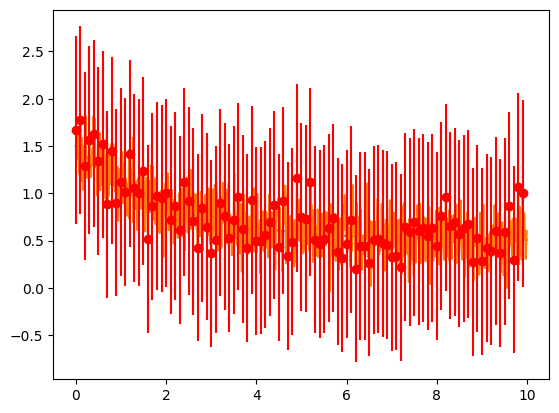

In [6]:
# Create a function with nonlinear dependence on parameters
def nlfunc(t, p1, p2):
    return np.exp(-p1 * t) + p2
z = nlfunc(t, 0.5, 0.5)
# Reuse the same noise - we are lazy
zn = z + 0.2*n
plt.plot(t, z, t, zn)
plt.errorbar(t[::10],zn[::10], np.std(n), fmt='ro')
plt.show()

In [7]:
# Set up the non-linear curve fit
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit(nlfunc, t, zn)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")

Estimated function: exp(-0.46938269970499125t) + 0.49412309991381853


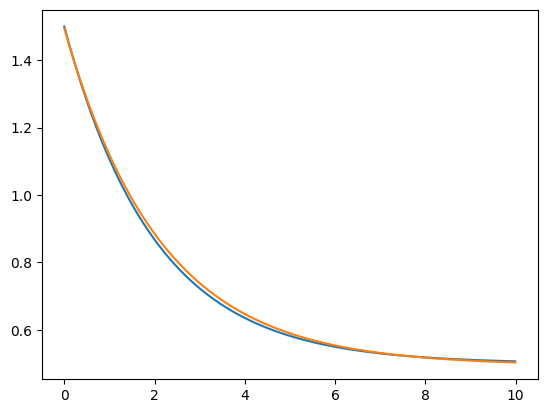

In [8]:
zest = nlfunc(t, zp1, zp2)
plt.plot(t, z, t, zest)

Estimated: 5.0370060655174695 * sin(2*pi*0.4993059245133733*t)


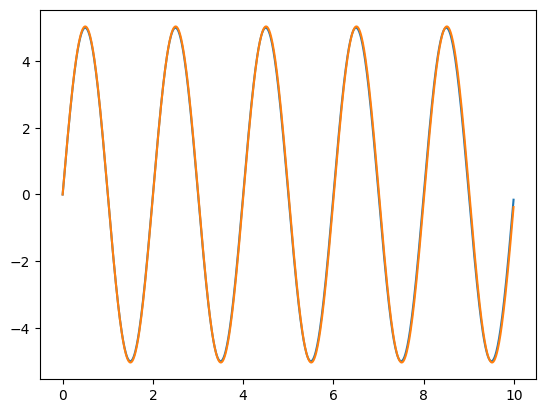

In [9]:
# Non-linear sinusoidal function
def sinfunc(t, p1, p2):
    return p1 * np.sin(2 * np.pi * p2 * t)
s = sinfunc(t, 5.0, 0.5)
sn = s + 0.2*n
# Fit with only first K points
K = 100
(sp1, sp2), _ = curve_fit(sinfunc, t[:K], sn[:K])
print(f"Estimated: {sp1} * sin(2*pi*{sp2}*t)")
# Regenerate data
sest = sinfunc(t, sp1, sp2)
plt.plot(t, s, t, sest)

# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

To plot our data we must first get it from a file and store it in the form of  lists, oen for the x axis and the other for the y axis. To do this we use the file open and read command, and a few inbuilt python functions map(maps values to a specified type) and split(breaks a string whenever it encounters the specified argument).

In [10]:
def data(filename):
    with open(filename) as f:
        file=list(map(float,f.read().split()))
        y=np.float64(np.array(file[1::2]))
        x=np.float64(np.array(file[::2]))
        return x,y
x,y=data("dataset1.txt")

Now we can plot our data and see what shape it approximates:

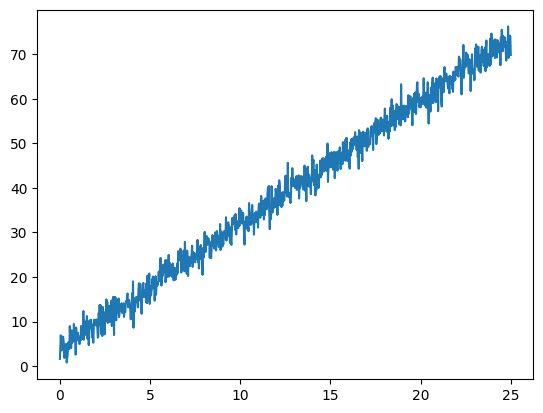

In [11]:
plt.plot(x,y)
plt.show()

To plot the curve the graph approximates, since the above graph looks linear we can try using the mean square method of approximating the curve. This includes fine tuning the constants of our linear equation in order to reduce the means square method. 

In [12]:
M = np.column_stack([x, np.ones(len(t))])
(p1, p2), _, _, _ = np.linalg.lstsq(M, y, rcond=None)
print(f"The estimated equation is {p1} x + {p2}")

The estimated equation is 2.791124245414918 x + 3.848800101430742


In [13]:
def stline(x, m, c):
    return m * x + c

We can now plot the Dataset and the Estimate:

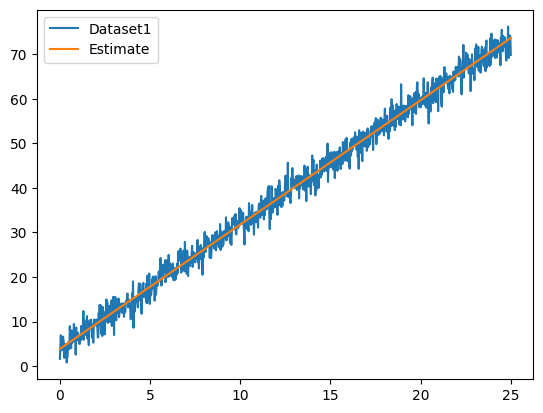

In [14]:
yest=np.array(stline(x, p1, p2))
plt.plot(x,y, label="Dataset1")
plt.plot(x,yest, label="Estimate")
plt.legend()
plt.show()

As we can see out straight line was a good approximation for the above graph.
In order to calculate the value of our errorbars we must find the standard deviation of the difference between our actual data and our estimate.

The standard deviation is: 1.9958487870009778


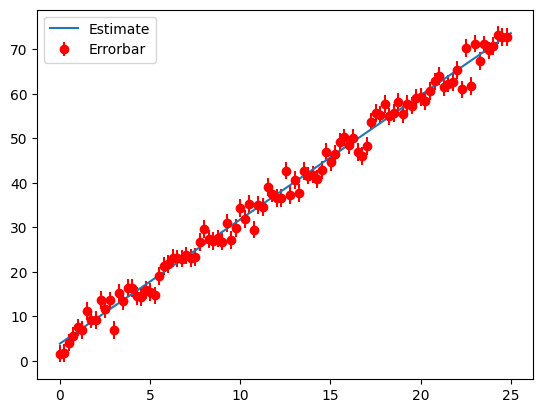

In [15]:
diff=y-yest
std1=np.std(diff, dtype = np.float64)
print(f"The standard deviation is: {std1}")
plt.errorbar(x[::10], y[::10], std1, fmt='ro',label="Errorbar")
plt.plot(x,yest, label="Estimate")
plt.legend()
plt.show()

Alternative approach:
using curve fit. we can use curve fit to approximate the curve.

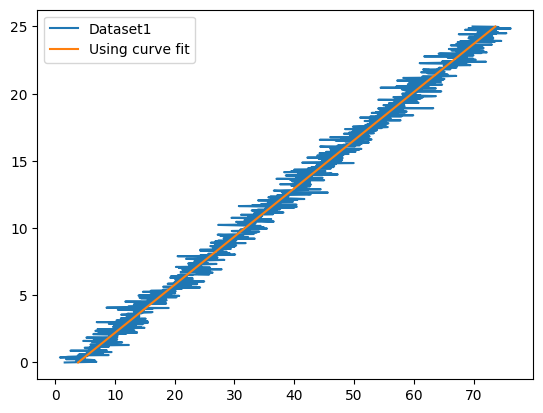

In [16]:
constants= curve_fit(stline,x,y)
p1=constants[0][0]
p2=constants[0][1]
ycf=stline(x,p1,p2)
plt.plot(y,x,label="Dataset1")
plt.plot(ycf,x, label="Using curve fit")
plt.legend()
plt.show()


The standard deviation is: 1.995848787000978


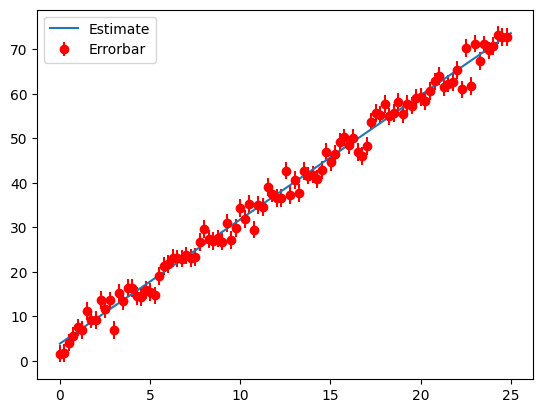

In [17]:
diff=y-ycf
std2=np.std(diff, dtype = np.float64)
print(f"The standard deviation is: {std2}")
plt.errorbar(x[::10], y[::10], std2, fmt='ro',label="Errorbar")
plt.plot(x,ycf, label="Estimate")
plt.legend()
plt.show()

In [18]:
%timeit np.linalg.lstsq(M, y, rcond=None)
%timeit curve_fit(stline,x,y)
lowerstd="Least squares method"
if std2<std1:
    lowerstd="Curve fit"
print(f"The estimate with the lower standard deviation is:{lowerstd}")

29.9 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
254 µs ± 6.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
The estimate with the lower standard deviation is:Least squares method


As we can see the least squares method is a much faster way of estimation. It also has a lower standard deviation. This is probably because curvefit it a generalized estimator and hence it might not be as good as lstsq to perform a particular task like straight line fitting 

## Dataset 2:

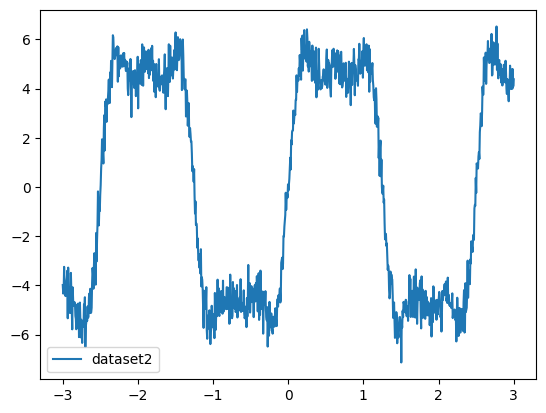

In [19]:
x,y=data("dataset2.txt")
plt.plot(x,y,label="dataset2")
plt.legend()
plt.show()

As we can see the above plot is almost simialr to a square wave. We therefore use the fourier series representation of a square wave to estimate the curve. We can then perform a curve fit to get the funciton which matches the data.

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


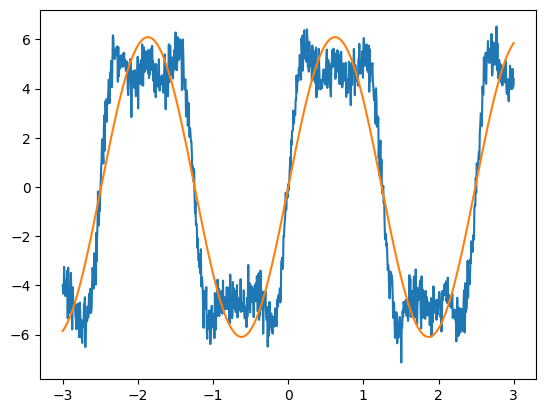

In [20]:
def sqwave(x, a, N, L):#Fourier series representation of a square wave with finite bounds of summation
    f=0
    N=int(N)
    for i in range(1,N+1,2):
        f+=(1/i)*np.sin((i*np.pi*x)/L)
    return(a*(4/np.pi)*f)
    
c=curve_fit(sqwave,x,y)
plt.plot(x, y, label="Dataset2")
plt.plot(x, sqwave(x, c[0][0],c[0][1],c[0][2]), label="Optimized estimate")
plt.show()

As we can see the data does not fit well. It cannot estimate the covariance of parameters and hence it throws a warning. This is a limitation of curve fit and therefore we must help it out by trying to optimize the bounds of the summation. we do that by minimizing the standard deviation between our guesses and the noise as implemented below:

In [21]:
#to find best fit for n
k=10000
diff=[]
std=1000
for i in range(1,k):
    y1=sqwave(x,c[0][0],i,c[0][2])
    diff=y-y1
    stdev=np.std(diff, dtype = np.float64)
    if stdev==std:
        continue
    if stdev<std or i==1:  #compares standard deviations and finds the best one
        std=stdev
        n=i
    else:
        break
print(f"The bounds of summation where we get minimum error is:{n}")


The bounds of summation where we get minimum error is:5


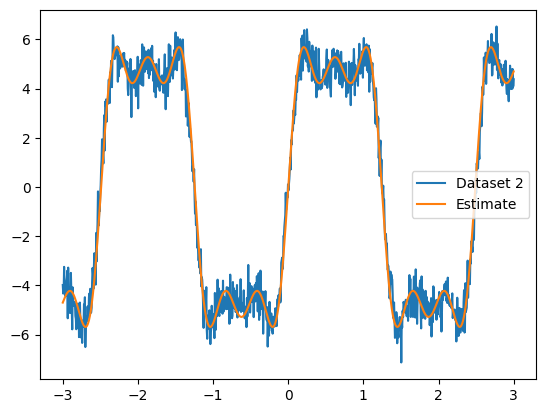

In [22]:
#Therefore the estimate for our data:
plt.plot(x,y,label="Dataset 2")
plt.plot(x,sqwave(x,c[0][0],n,c[0][2]),label="Estimate")
plt.legend()
plt.show()

We can now plot the error bars for our estimate. To show the standard deviation of our data.

The standard deviation is: 0.5542687600745666


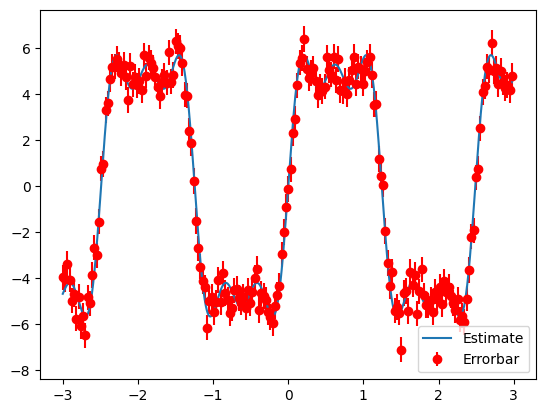

In [23]:
y1=sqwave(x,c[0][0],n,c[0][2])
diff=y-y1
std=np.std(diff, dtype = np.float64)
print(f"The standard deviation is: {std}")
plt.errorbar(x[::5], y[::5], std, fmt='ro',label="Errorbar")#We plot for thirty to avoid errorbar clutter
plt.plot(x,y1, label="Estimate")
plt.legend()
plt.show()


## Dataset 3:

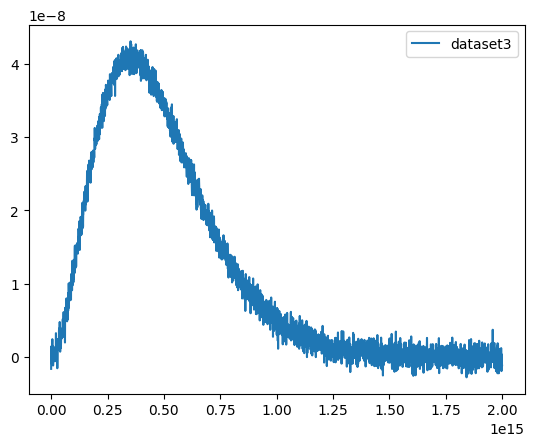

In [24]:
x,y=data("dataset3.txt")
plt.plot(x,y,label="dataset3")
plt.legend()
plt.show()

The above function is known as planck's intenstiy function. In physics, Planck's law describes the spectral density of electromagnetic radiation emitted by a black body in thermal equilibrium at a given temperature T, when there is no net flow of matter or energy between the body and its environment. We therefore implement the function in python using numpy and other standard funcitons. Using this we can estimate plancks constant and the Temperature at which the data is taken.

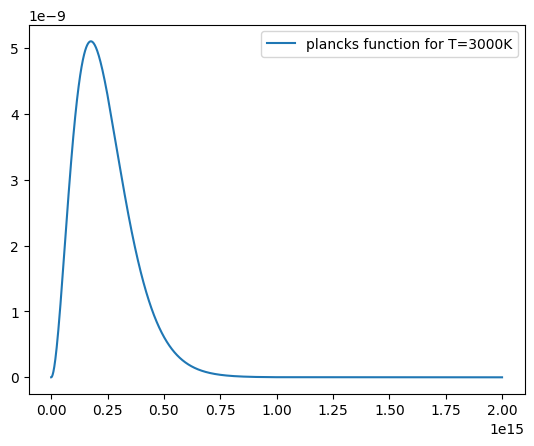

In [25]:
#h = 6.626e-34
c = 3.0e+8
k = 1.38e-23
def planck(x, t,h):
    freq=np.float64(x)
    T=np.float64(t)
    a = (2.0*h/(c**2))*(freq**3)
    b = (h*freq)/(k*T)
    intensity = np.float64(a/ ((np.exp(b)) - 1.0) )
    return np.float64(intensity)
freq=x
intensity3000=planck(x,3000,6.626e-34)
plt.plot(freq,intensity3000,label="plancks function for T=3000K")
plt.legend()
plt.show()

As there are two variables we have to optimize it is not possible to get to a function which best approximates the curve we therefore have to give some initial guesses in the ballpark range to get the correct curve values.

6011.361512409832 6.643229744444993e-34


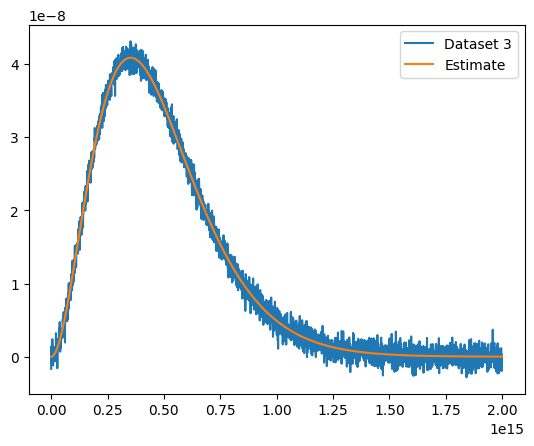

In [26]:
constants=curve_fit(planck,x,y,p0=(100,1e-34)) #for temperatures too low we get a 0 division error so we start at 100
print(constants[0][0],constants[0][1])
plt.plot(x,y,label="Dataset 3")
plt.plot(freq,planck(freq,constants[0][0],constants[0][1]),label="Estimate")
plt.legend()
plt.show()

We can now plot the errorbars for the data by taking the standard deviation of the difference of the data and our estimate.

The standard deviation is: 9.919630671637248e-10


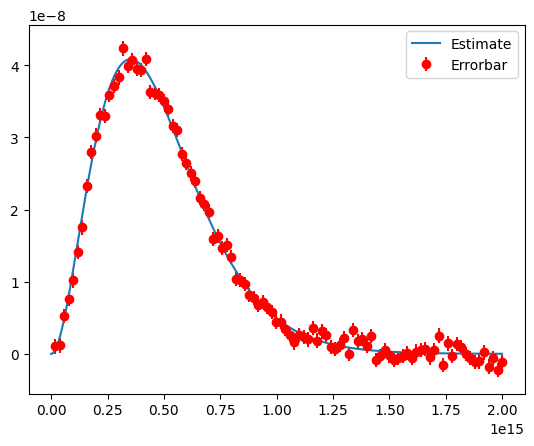

In [27]:
y1=planck(freq,constants[0][0],constants[0][1])
diff=y-y1
std=np.std(diff, dtype = np.float64)
print(f"The standard deviation is: {std}")
plt.errorbar(x[::30], y[::30], std, fmt='ro',label="Errorbar")#We plot for thirty to avoid errorbar clutter
plt.plot(x,y1, label="Estimate")
plt.legend()
plt.show()


# Dataset 4

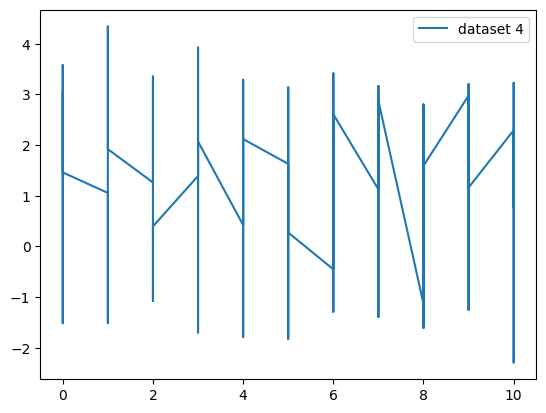

Plot of dataset4


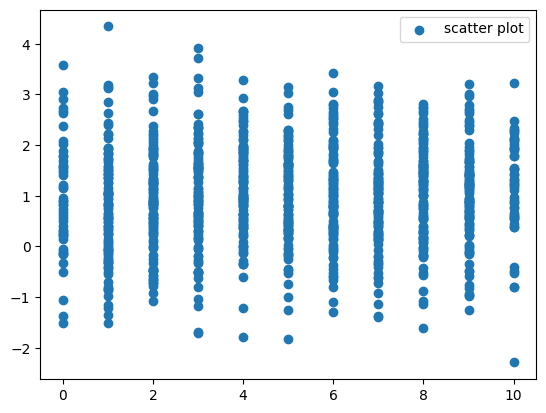

Scatter plot of data


In [28]:
x,y=data("dataset4.txt")
plt.plot(x,y,label="dataset 4")
plt.legend()
plt.show()
print("Plot of dataset4")
plt.scatter(x,y,label="scatter plot")
plt.legend()
plt.show()
print("Scatter plot of data")

As we can see the data has multiple values for the same x value. Therefore it can't be estimated by a function as by definition a function has to have one output for one input. The only way we can perform a curve fit or estimate, is if we take the average of the given data for the given x values.

In [29]:
avg=[]
s=y[0]
count=1
dp=[]  #Number of datapoints
for i in range(1,len(x)):
    if int(x[i])==int(x[i-1]):
        s+=y[i]
        count+=1
    if x[i]!=x[i-1] or i==(len(x)-1):
        avg.append(s/count)
        s=y[i]
        count=1
        dp.append(x[i-1])
dp=np.array(dp)
avg=np.array(avg)



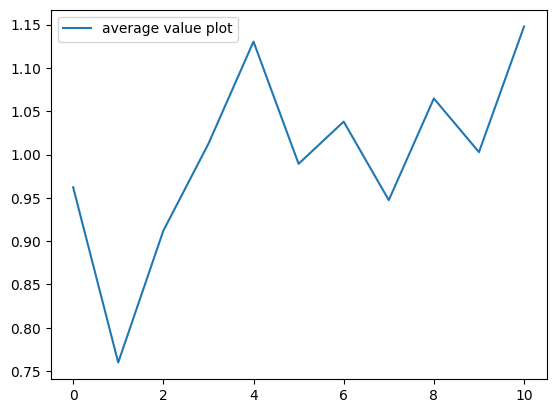

Plot of the raw data


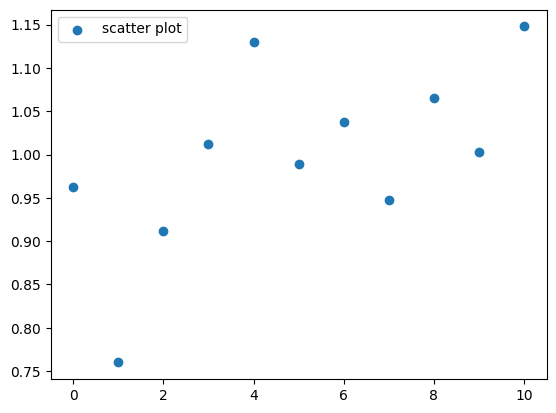

Plot of the estimate


In [30]:
plt.plot(dp,avg,label="average value plot") #plotting the average
plt.legend()
plt.show()
print("Plot of the raw data")
plt.scatter(dp,avg,label="scatter plot")
plt.legend()
plt.show()
print("Plot of the estimate")

As we can see the discrete points of the average can be somewhat estimated with a polynomial of arbitrary frequency.

We can use numpy.polyfit to do this task. It basically Fits a polynomial of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.

We can then use the poly1d function to generate the output array.

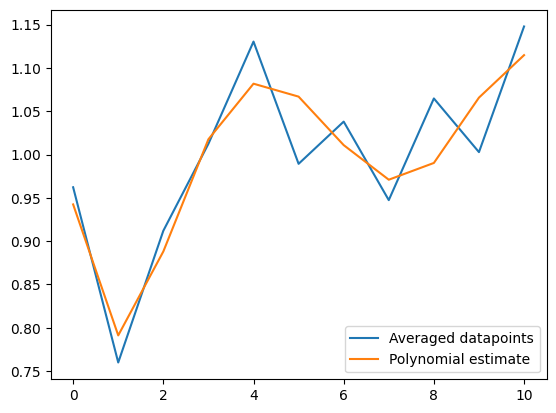

In [31]:
coeff=np.polyfit(x,y,5)
p = np.poly1d(coeff)
plt.plot(dp,avg,label="Averaged datapoints")
plt.plot(x,p(x),label="Polynomial estimate")
plt.legend()
plt.show()

We can then plot the error-bars:


The standard deviation is: 0.04490025791929215


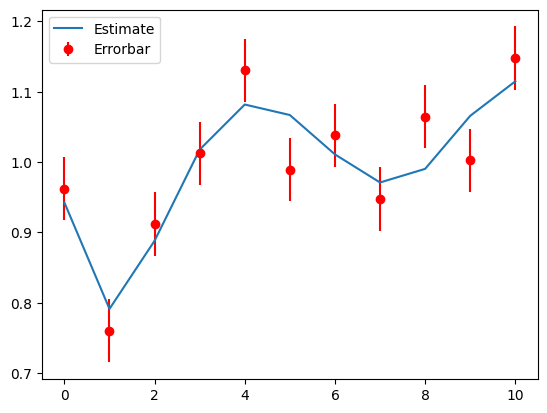

In [32]:
diff=avg-p(dp)
std=np.std(diff, dtype = np.float64)
print(f"The standard deviation is: {std}")
plt.errorbar(dp, avg, std, fmt='ro',label="Errorbar")#We plot for thirty to avoid errorbar clutter
plt.plot(dp,p(dp), label="Estimate")
plt.legend()
plt.show()

We now want to  maximise the degree of the polynomial. As polyfit struggles for polynomials greater than 10 we stop at ten.

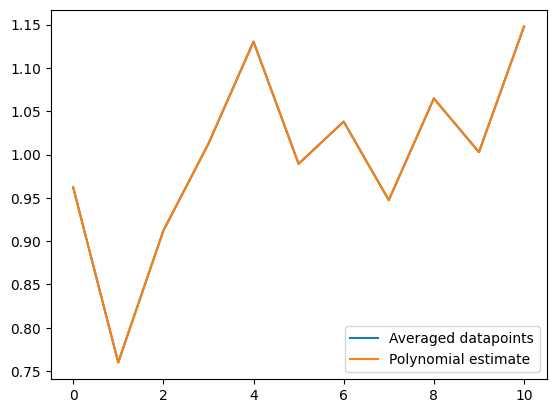

In [33]:
coeff=np.polyfit(x,y,10)
p = np.poly1d(coeff)
plt.plot(dp,avg,label="Averaged datapoints")
plt.plot(x,p(x),label="Polynomial estimate")
plt.legend()
plt.show()

Thus it works perfectly for a 10 degree polynomial.

# Conclusion 

Data analysis is a very powerful tool and knowing what tools to use and when can greatly enhance the information we want to extract. Least square minimization and curve fit are awesome tools but they do have their limitations, especially when the data can be interpreted in various ways like in experiment 4.